## Question 1

# Noise Reduction:
 
## A) Read the image 'bridge.gif'. Filter the images using the masks of of 3x3, 5x5 and 7x7. How does the size of the mask affect blurring and noise reduction? Which do you think provides a better tradeoff between blurring and noise reduction for this image?

## Answer :
### When the mask size increases, the blurring becomes stronger, the noise reduction improves, and more image details are lost.
### I think the 3×3 mask provides a better trade-off, because the image does not contain much noise, and increasing the mask size leads to unnecessary blurring and loss of details.

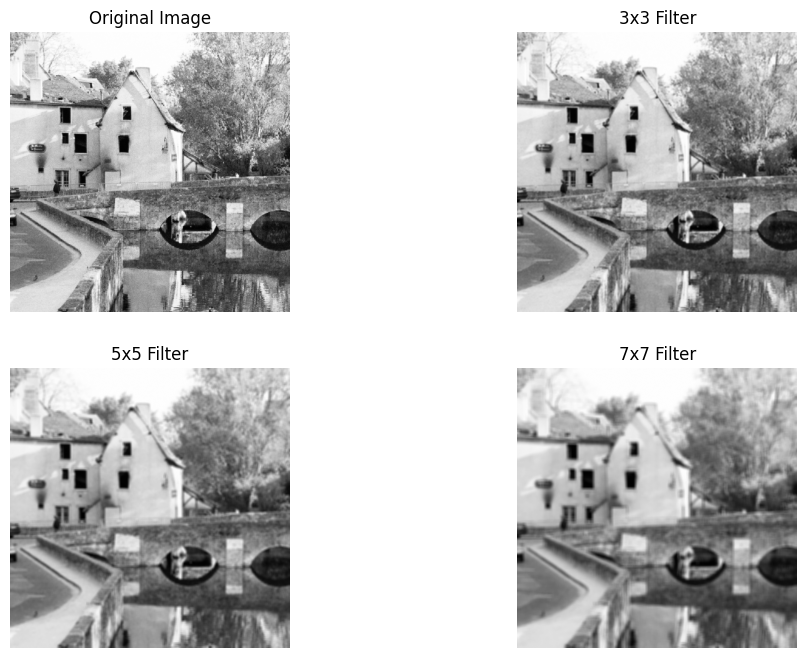

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
img1 = cv2.imread("bridge.gif", cv2.IMREAD_GRAYSCALE)

min_val = np.min(img1)
max_val = np.max(img1)
img1_norm = (img1 - min_val) / (max_val - min_val) 

# filters
blur_3 = cv2.blur(img1_norm, (3, 3))
blur_5 = cv2.blur(img1_norm, (5, 5))
blur_7 = cv2.blur(img1_norm, (7, 7))

# Show results
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(img1, cmap="gray")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.title("3x3 Filter")
plt.imshow(blur_3, cmap="gray")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.title("5x5 Filter")
plt.imshow(blur_5, cmap="gray")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.title("7x7 Filter")
plt.imshow(blur_7, cmap="gray")
plt.axis("off")

plt.show()


## B) Sharpen the 3x3 blurred image by convolving with the Laplacian mask

\begin{bmatrix}
0 & -1 & 0 \\
-1 & 5 & -1 \\
0 & -1 & 0
\end{bmatrix}

### Display and submit. Does this operation reduce the blurring? What about the original noise? You might need to rescale this image after convolving to make the effect more visible and to make the contrast more pleasing.

## Answer :
### Yes, sharpening with the Laplacian kernel reduces the blurring to some extent by enhancing edges and contrast, although it does not completely recover the original details lost during the blur.

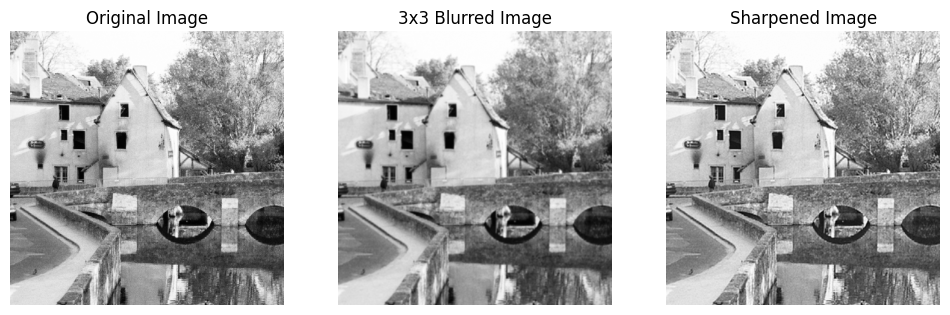

In [10]:
# Define Laplacian sharpening kernel
laplacian_kernel = np.array([[0, -1, 0],
                             [-1, 5, -1],
                             [0, -1, 0]], dtype=np.float32)

# Convolve blurred image with Laplacian kernel
sharpened = cv2.filter2D(blur_3, -1, laplacian_kernel)

# Display results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img1, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("3x3 Blurred Image")
plt.imshow(blur_3, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Sharpened Image")
plt.imshow(sharpened, cmap="gray")
plt.axis("off")

plt.show()


## C) Apply a second sharpening step as in (B). Display and submit. Would repeated sharpening help image interpretation? Again, rescaling will be needed to see the effect.

## Answer :
### No. Repeating the Laplacian sharpening does not make the image more detailed. It only slightly enhances the edges and increase noise.

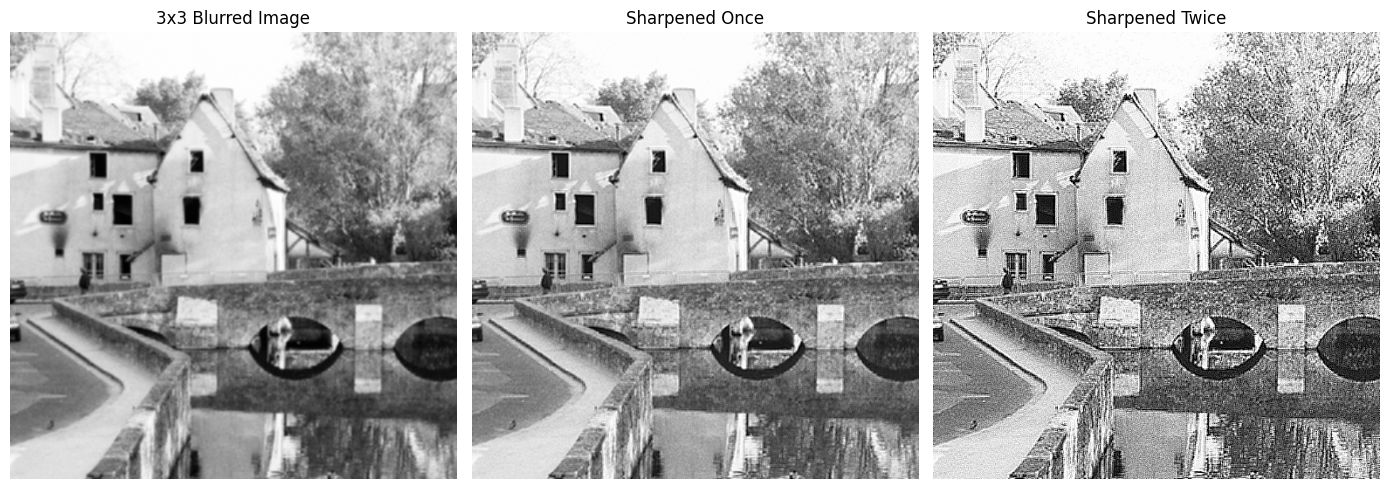

In [ ]:

sharpened_2 = cv2.filter2D(sharpened, -1, laplacian_kernel)

plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
plt.title("3x3 Blurred Image")
plt.imshow(blur_3, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Sharpened Once")
plt.imshow(sharpened, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Sharpened Twice")
plt.imshow(sharpened_2, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()

## Question 2

Noise reduction is a crucial task to enhance the quality of images. You are provided with a noisy grayscale image, 'brain.png,' and your task is to apply noise reduction using two different methods: Median Filtering and Averaging Filtering.

**A)** Describe each of the two methods for noise reduction in images. Explain how they work and their key characteristics in addressing noise.

**B)** Apply noise reduction to the 'brain.png' image using Averaging Filtering. Use different kernel sizes (e.g., 3x3, 5x5, ...) and determine which kernel size offers a better trade-off between blurring and noise reduction for this image.

**C)** Apply noise reduction on the 'brain.png' image using Median Filtering. Use different kernel sizes (e.g., 3x3, 5x5, ...) and compare their results together in a single figure. Based on your observations, which kernel size do you think is better for noise reduction in this image?

**D)** For each of the two methods, discuss their advantages and disadvantages in the context of noise reduction. Consider aspects such as noise removal effectiveness, preservation of image details.

<img src="brain.png" width="200" height="200"/>

## Question 3

The Laplacian and Sobel operators are used for edge detection, the Laplacian operator focuses on second-order derivatives to identify rapid changes in intensity, while the Sobel operator is specifically designed for computing the gradient magnitude, emphasizing edges along the horizontal and vertical directions.

**A)** When would it be more advantageous to employ Sobel edge detection versus Laplacian edge detection in image processing applications?

**B)** Open the image 'Edge.jpg,' apply the Sobel edge detector separately along the x and y dimensions, and then visualize the results for each dimension as well as the combined effect.

**C)** Open the image 'Edge.jpg,' apply the Laplacian edge detector, and display the results for Edge Detection and Magnitude.

**D)** Examine the results of these two methods and figure out which one works better for this task.

<img src="Edge.jpg" width="200" height="200"/>

## Question 4

In this question, you will explore the Robert-Cross and Prewitt operators, compare their results, and then apply a high-boost filter to undo their effects. Use the image below for this question.

**A)** Briefly explain how Roberts cross-gradient operator works and then apply it on the given image and display the result.

**B)** Briefly explain how Prewitt operator works and then apply it to the given image and display the result.

**C)** Display the original image, the results of the Robert-Cross operator, and the results of the Prewitt operator side by side. 

**D)** Apply a high-boost filter to the images obtained after the Robert-Cross and Prewitt operators. Experiment with different values of 'A' and observe the changes.

**E)** Write a brief discussion on the differences observed between the results of the Roberts cross-gradient and Prewitt operators. Explain how the high-boost filter affects the results of these operators and the significance of the chosen value of ‘A’.

<img src="cat.gif" width="200" height="200"/>

## Question 5

To achieve successful image enhancement, it is often ineffective to rely on a single operation. Instead, a combination of techniques is utilized to attain the desired final result. Please open the image 'skeleton.png' and apply the enhancement methods you have already learned, incorporating spatial enhancement techniques.

**A)** Open the image 'skeleton.png,' apply your desired enhancement methods to achieve the best visibility of the bones. Explain your methods and why you chose them.

**B)** Compare the original image with your enhanced version in a single figure, illustrating them before and after enhancement.

<img src="skeleton.png" width="200" height="200"/>